# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

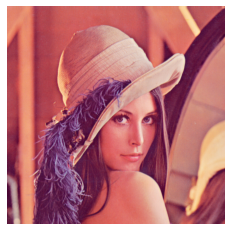

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = './D00_lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
plt.imshow(img[...,[2, 1, 0]])
plt.axis('off')
plt.show()

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

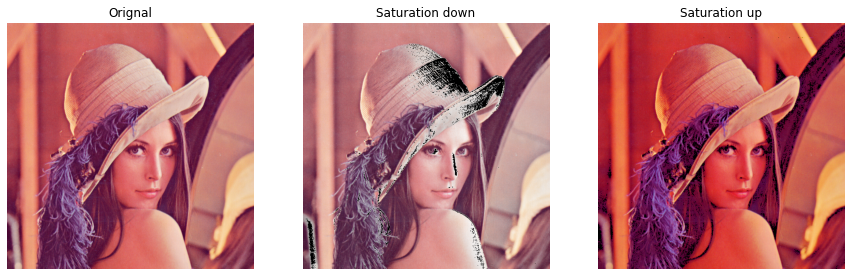

In [2]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

plt.figure(figsize=(15,5))
for i,x in enumerate(['Orignal','Saturation down','Saturation up']):
    arr = img[:]
    # 在 HSV color space 增減飽和度
    if i:
        arr = img_hsv.astype('float32')
        arr[..., 1] = arr[..., 1] + (2*i-3)*change_percentage*255
    
        # 針對飽和度的值做改變，超過界線 0~1 的都會 bound
        arr[(arr[..., 1] < 0) | (arr[..., 1] > 255)] = 0

        # 轉換 color space 回 BGR
        arr = cv2.cvtColor(arr.astype('uint8'), cv2.COLOR_HSV2BGR)
    
    # 組合圖片 + 顯示圖片
    plt.subplot(1, 3, i+1, title = x)
    plt.imshow(arr[...,[2, 1, 0]])
    plt.axis('off')
plt.show()

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

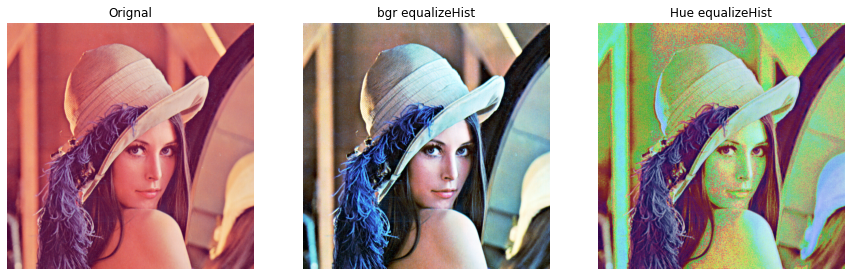

In [3]:
# case 1
# 每個 channel 個別做直方圖均衡
equalHist_by_channel = [cv2.equalizeHist(i) for i in cv2.split(img)]

# 組合經過直方圖均衡的每個 channel
img_bgr_equal = np.stack(equalHist_by_channel, axis = -1)

# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv_h_equal = img_hsv.copy()
img_hsv_h_equal[...,0] = cv2.equalizeHist(img_hsv_h_equal[...,0])
img_hsv_h_equal = cv2.cvtColor(img_hsv_h_equal, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
plt.figure(figsize=(15,5))
for i,x in enumerate({'Orignal': img,
                      'bgr equalizeHist': img_bgr_equal,
                      'Hue equalizeHist': img_hsv_h_equal}.items()):
    plt.subplot(1, 3, i+1, title = x[0])
    plt.imshow(x[1][...,[2, 1, 0]])
    plt.axis('off')


## 調整對比 / 明亮

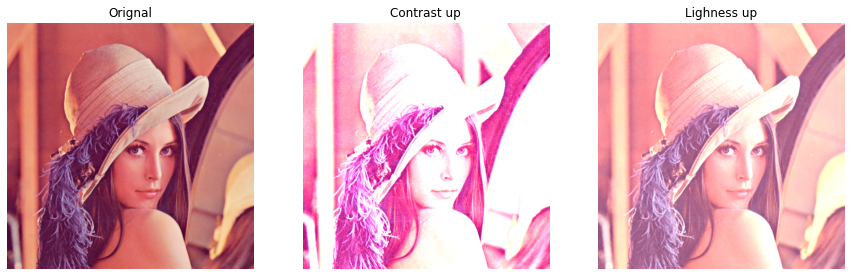

In [4]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=2.5)
add_lighness = cv2.convertScaleAbs(img, beta=75)

# 組合圖片 + 顯示圖片
plt.figure(figsize=(15,5))
for i,x in enumerate({'Orignal' : img,
                      'Contrast up' : add_contrast,
                      'Lighness up' : add_lighness}.items()):
    plt.subplot(1, 3, i+1, title = x[0])
    plt.imshow(x[1][...,[2, 1, 0]])
    plt.axis('off')